# Alignment Issue

The final r and halpha mosaics are aligned ok when you align in ds9 using the WCS.  

However, when you align by image, there is an offset.  

Going to try to reproject the r-band image onto the halpha image.

In [30]:
import os
import numpy as np
from matplotlib import pyplot
from astropy.io import fits
from matplotlib import pyplot as plt
homedir = os.getenv("HOME")

In [26]:
def display_image(image,percent=99.5,lowrange=False,mask=None,sigclip=True):
    from astropy.stats import sigma_clip
    from astropy.visualization import simple_norm
    from matplotlib import pyplot as plt
    lowrange=False
    if sigclip:
        clipped_data = sigma_clip(image,sigma_lower=5,sigma_upper=5)#,grow=10)
    else:
        clipped_data = image
    if lowrange:
        norm = simple_norm(clipped_data, stretch='linear',percent=percent)
    else:
        norm = simple_norm(clipped_data, stretch='asinh',percent=percent)

    plt.imshow(image, norm=norm,cmap='gray_r',origin='lower')
    #v1,v2=scoreatpercentile(image,[.5,99.5])            
    #plt.imshow(image, cmap='gray_r',vmin=v1,vmax=v2,origin='lower')    


In [10]:
os.chdir('/media/rfinn/hdata/laptop-data/BOK-alignment-test')

In [11]:
!ls

VF-172.650+35.671-BOK-20210417-VFID2484-Ha4-CS.fits
VF-172.650+35.671-BOK-20210417-VFID2484-Ha4-CS-ZP.fits
VF-172.650+35.671-BOK-20210417-VFID2484-Ha4.fits
VF-172.650+35.671-BOK-20210417-VFID2484-Ha4.weight.fits
VF-172.650+35.671-BOK-20210417-VFID2484-r.fits
VF-172.650+35.671-BOK-20210417-VFID2484-r-shifted.fits
VF-172.650+35.671-BOK-20210417-VFID2484-r.weight.fits


In [13]:
!rm *shifted.fits


In [17]:
himagename = 'VF-172.650+35.671-BOK-20210417-VFID2484-Ha4.fits'
rimagename = 'VF-172.650+35.671-BOK-20210417-VFID2484-r.fits'
rshiftname = 'VF-172.650+35.671-BOK-20210417-VFID2484-r-shifted.fits'
rweightname = 'VF-172.650+35.671-BOK-20210417-VFID2484-r.weight.fits'

In [7]:
%run ~/github/HalphaImaging/python3/INT_align_images.py --help

usage: INT_align_images.py [-h] [--image1 IMAGE1] [--image2 IMAGE2]
                           [--weight2 WEIGHT2]

group objects by filter and target for combining with swarp

optional arguments:
  -h, --help         show this help message and exit
  --image1 IMAGE1    Image to serve as reference
  --image2 IMAGE2    Image to align to reference
  --weight2 WEIGHT2  Weight map for image2


In [14]:
%run ~/github/HalphaImaging/python3/INT_align_images.py --image1 $himagename --image2 $rimagename --weight2 $rweightname

	 shifting image


/home/rfinn/anaconda3/lib/python3.7/site-packages/reproject/array_utils.py:30: RuntimeWarning: invalid value encountered in less
  reset |= (coords[i] < -0.5)
/home/rfinn/anaconda3/lib/python3.7/site-packages/reproject/array_utils.py:31: RuntimeWarning: invalid value encountered in greater
  reset |= (coords[i] > original_shape[i] - 0.5)


	 elapsed time =  83.44748292595614
	 shifting weight image
	 total time =  163.8387348370161


In [19]:
# test subtraction
hhdu = fits.open(himagename)[0]
rhdu = fits.open(rimagename)[0]
shdu = fits.open(rshiftname)[0]


In [20]:
# subtract images

sub_orig = hhdu.data - 0.0599*rhdu.data
sub_new = hhdu.data - 0.0599*shdu.data

In [32]:
range = 

SyntaxError: invalid syntax (<ipython-input-32-05b24595c118>, line 1)

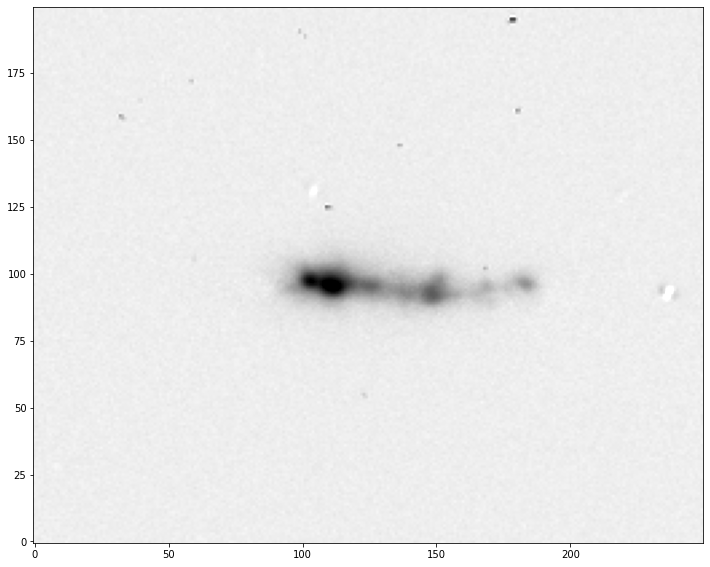

In [41]:
plt.figure(figsize=(12,12))
display_image(sub_new[1600:1800,1150:1400],percent=99.9)

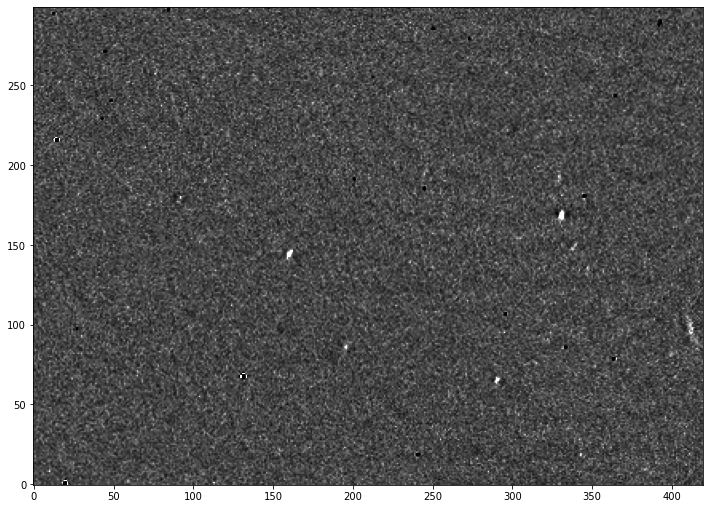

In [57]:
plt.figure(figsize=(12,12))
display_image(sub_new[1250:1550,2050:2470],percent=99.9,lowrange=True)

Text(0.5, 1.0, 'original r-band image')

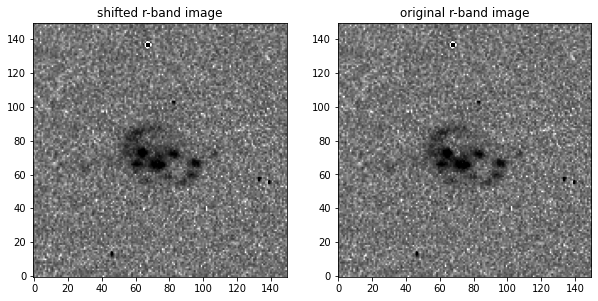

In [71]:
# VFID2427
plt.figure(figsize=(10,6))

xc = 5325
yc = 7152
dx = 150
dy = 150

plt.subplot(1,2,1)
display_image(sub_new[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2],percent=99.5,lowrange=True)
plt.title("shifted r-band image")
plt.subplot(1,2,2)
display_image(sub_orig[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2],percent=99.5,lowrange=True)
plt.title("original r-band image")

Text(0.5, 1.0, 'original r-band image')

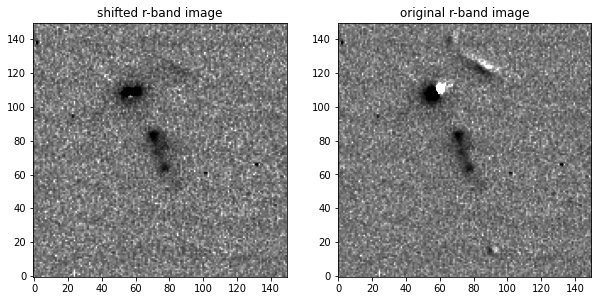

In [73]:
# VFID24234
plt.figure(figsize=(10,6))

xc = 8836
yc = 6458
dx = 150
dy = 150

plt.subplot(1,2,1)
display_image(sub_new[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2],percent=99.5,lowrange=True)
plt.title("shifted r-band image")
plt.subplot(1,2,2)
display_image(sub_orig[yc-dy//2:yc+dy//2,xc-dx//2:xc+dx//2],percent=99.5,lowrange=True)
plt.title("original r-band image")

# Problems

30 images come out with different sizes in the halpha and shifted r-band images.  Just by 1 pixel in 1 of the dimensions.  How do I ensure that the output images have exactly the same size as the reference image???

In [74]:
from reproject import reproject_interp

In [75]:
help(reproject_interp)

Help on function reproject_interp in module reproject.interpolation.high_level:

reproject_interp(input_data, output_projection, shape_out=None, hdu_in=0, order='bilinear', independent_celestial_slices=False, output_array=None, return_footprint=True)
    Reproject data to a new projection using interpolation (this is typically
    the fastest way to reproject an image).
    
    Parameters
    ----------
    input_data
        The input data to reproject. This can be:
    
            * The name of a FITS file
            * An `~astropy.io.fits.HDUList` object
            * An image HDU object such as a `~astropy.io.fits.PrimaryHDU`,
              `~astropy.io.fits.ImageHDU`, or `~astropy.io.fits.CompImageHDU`
              instance
            * A tuple where the first element is a `~numpy.ndarray` and the
              second element is either a `~astropy.wcs.WCS` or a
              `~astropy.io.fits.Header` object
            * An `~astropy.nddata.NDData` object from which the ``.da